# Covid analysis project

In [13]:
# importing basic libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading csv dataset file 
df=pd.read_csv("D:\data science\partice_projects\capstone_projects\covid_19_clean_complete-1\covid_19_clean_complete.csv")

## Data exploration

In [15]:
df.head(10) # checking first 10 rows of dataset

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [16]:
df.tail(10) #  checking last 10 rows

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49058,NaN,Malawi,-13.254300,34.301500,2020-07-27,3664,99,1645,1920,Africa
49059,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-07-27,4,0,1,3,Europe
49061,NaN,South Sudan,6.877000,31.307000,2020-07-27,2305,46,1175,1084,Africa
49062,NaN,Western Sahara,24.215500,-12.885800,2020-07-27,10,1,8,1,Africa
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [17]:
df['Confirmed'].sum()

828508482

In [18]:
df['Deaths'].sum()

43384903

In [19]:
df.info() # checking the information of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [20]:
df['WHO Region'].value_counts() # checking how many region are present in data set

WHO Region
Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: count, dtype: int64

In [21]:
df.shape # checking the size of data set

(49068, 10)

## Data preprocessing

In [22]:
df.isnull().sum() # checking null values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [23]:
df.drop(columns=['Province/State'],inplace=True) 
# since the 1st column as more than 1/4 of null values will drop the 1st column but will not be droping any rows beacues the date has to be contionus

In [24]:
df.shape

(49068, 9)

In [25]:
df.duplicated().sum() # checking for duplicate values

0

In [26]:
# will be not be checking the outliers 

## Visualization

* The trend of confirmed vs total deaths vs recovered 

C:\Users\L N GANDOIKAR\AppData\Local\Temp\ipykernel_12844\2698001791.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=new_date, x='Date', y='Deaths', hue='WHO Region',ci=None)
D:\data science\Python installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\data science\Python installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


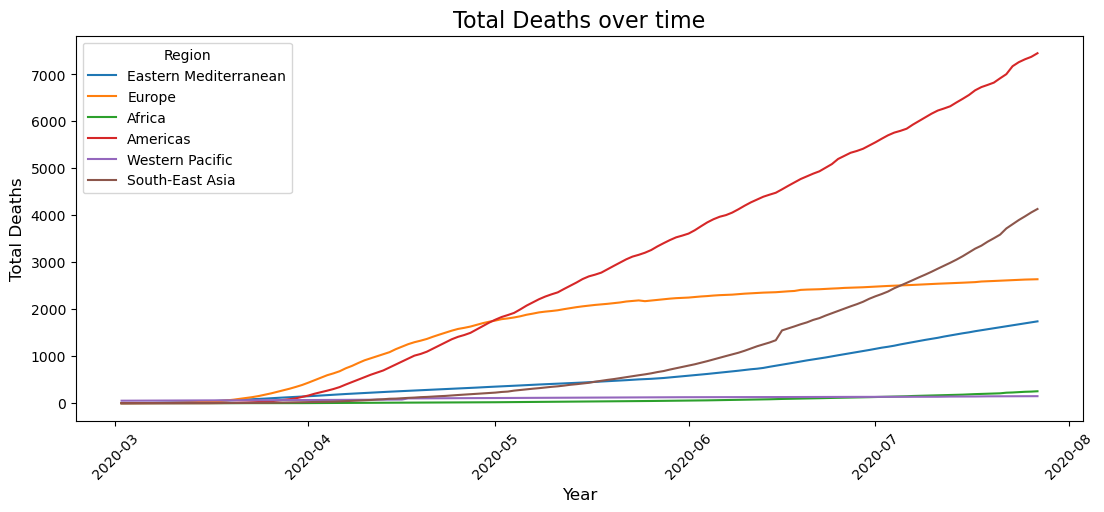

In [27]:
plt.figure(figsize=(13, 5))
df['Date'] = pd.to_datetime(df['Date'])
new_date=df[df['Date']>'2020-03']
sns.lineplot(data=new_date, x='Date', y='Deaths', hue='WHO Region',ci=None)
plt.title('Total Deaths over time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left')
plt.show()
import warnings
warnings.filterwarnings("ignore")

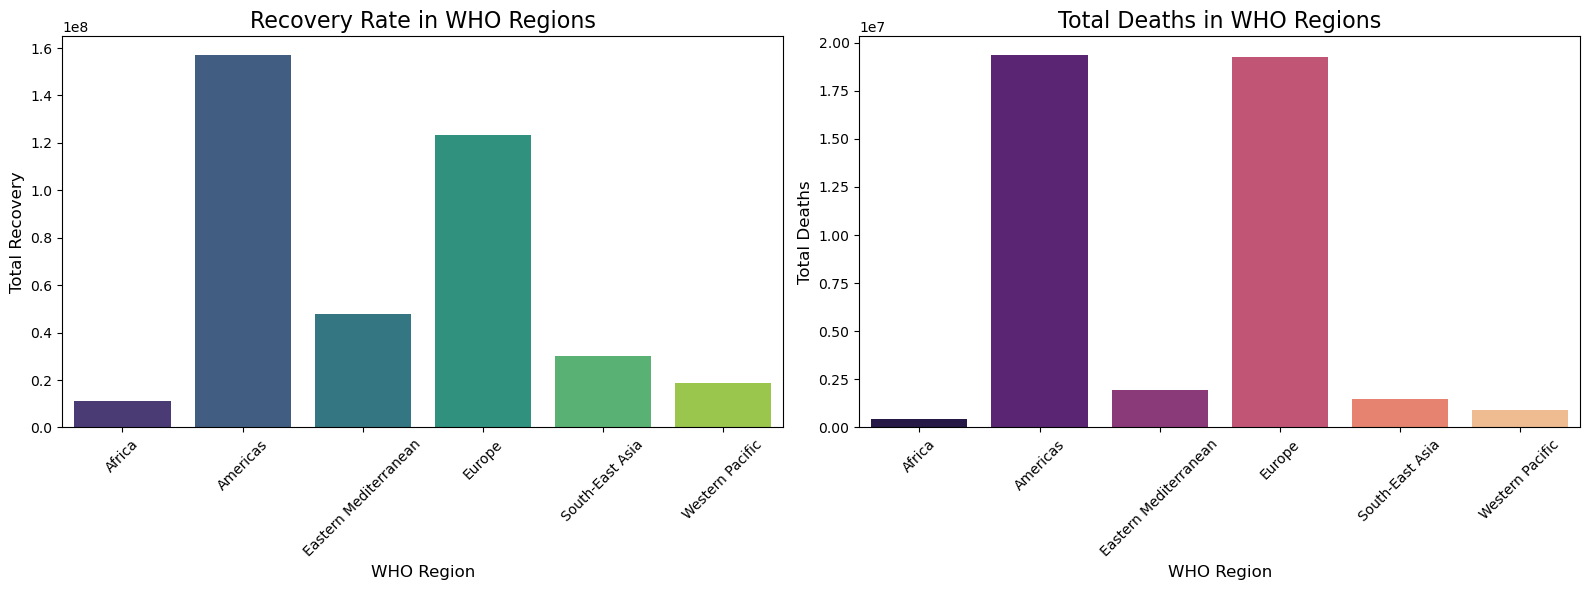

In [28]:
grouped_data = df.groupby('WHO Region')[['Recovered', 'Deaths']].sum().reset_index() # Group data by WHO Region and calculate the total for Recovered and Deaths
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust size as needed
sns.barplot(ax=axes[0], x='WHO Region', y='Recovered', data=grouped_data, palette='viridis')# Subplot 1: Recovery Rate by WHO Region
axes[0].set_title('Recovery Rate in WHO Regions', fontsize=16)
axes[0].set_xlabel('WHO Region', fontsize=12)
axes[0].set_ylabel('Total Recovery', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(ax=axes[1], x='WHO Region', y='Deaths', data=grouped_data, palette='magma')# Subplot 2: Total Deaths by WHO Region
axes[1].set_title('Total Deaths in WHO Regions', fontsize=16)
axes[1].set_xlabel('WHO Region', fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

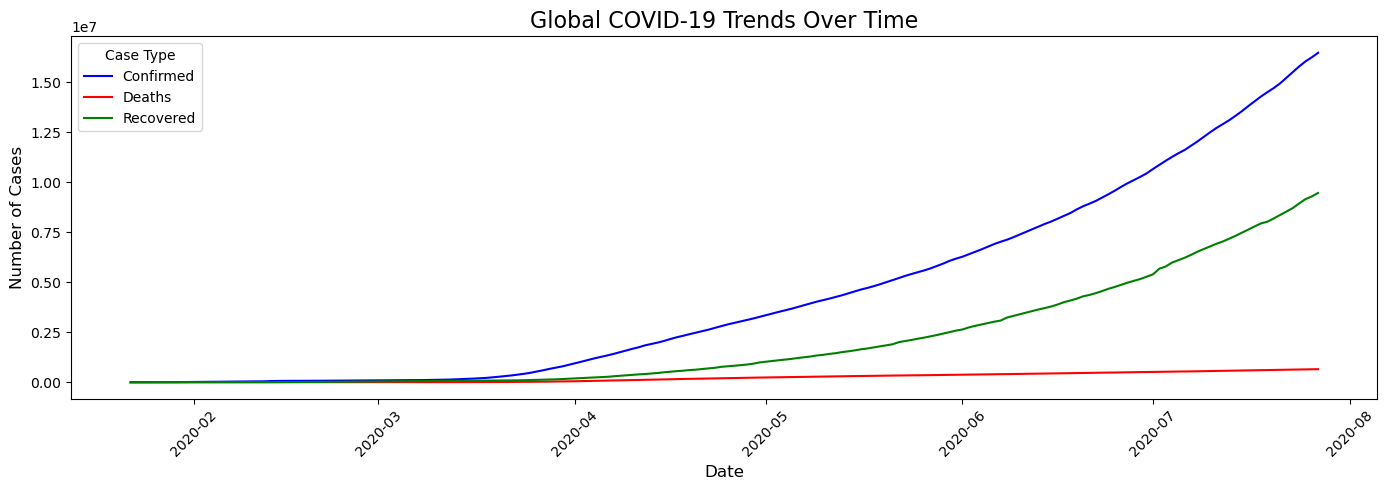

In [29]:
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index() # Group data by date for global trends
plt.figure(figsize=(14, 5))
sns.lineplot(data=global_trends, x='Date', y='Confirmed', label='Confirmed', color='blue')
sns.lineplot(data=global_trends, x='Date', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=global_trends, x='Date', y='Recovered', label='Recovered', color='green')
plt.title('Global COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Case Type', fontsize=10)
plt.tight_layout()
plt.show()

### Top 10 affected cites

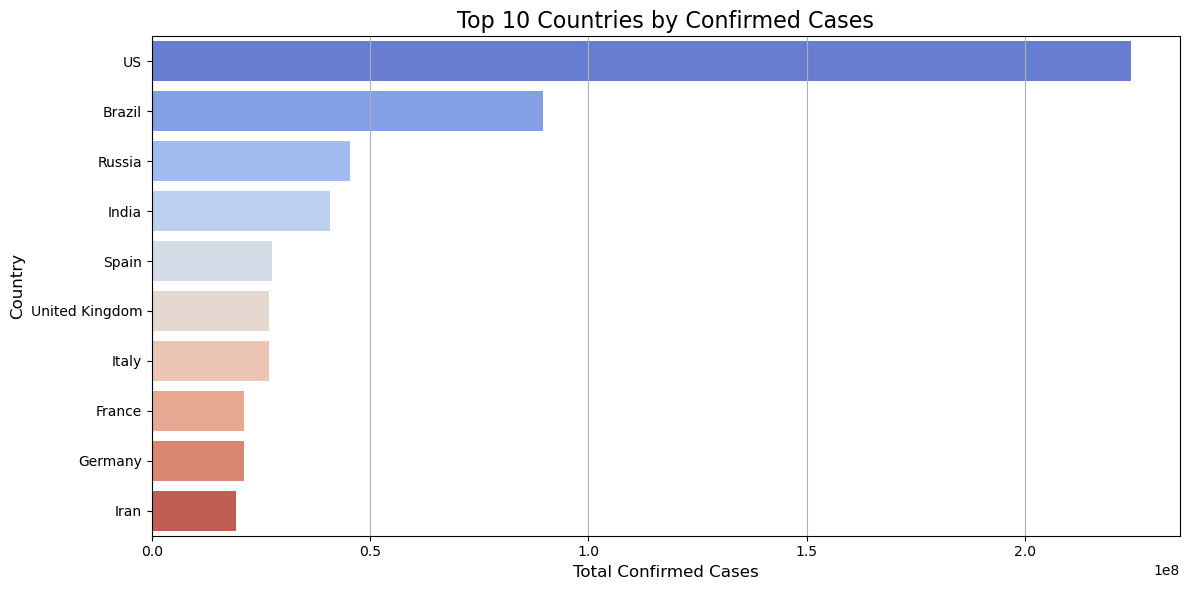

In [30]:
country_data = df.groupby('Country/Region')[['Confirmed']].sum().reset_index() # Group data by country and calculate total confirmed cases
top_10_countries = country_data.nlargest(10, 'Confirmed') 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='Confirmed', y='Country/Region', palette='coolwarm')
plt.title('Top 10 Countries by Confirmed Cases', fontsize=16)
plt.xlabel('Total Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

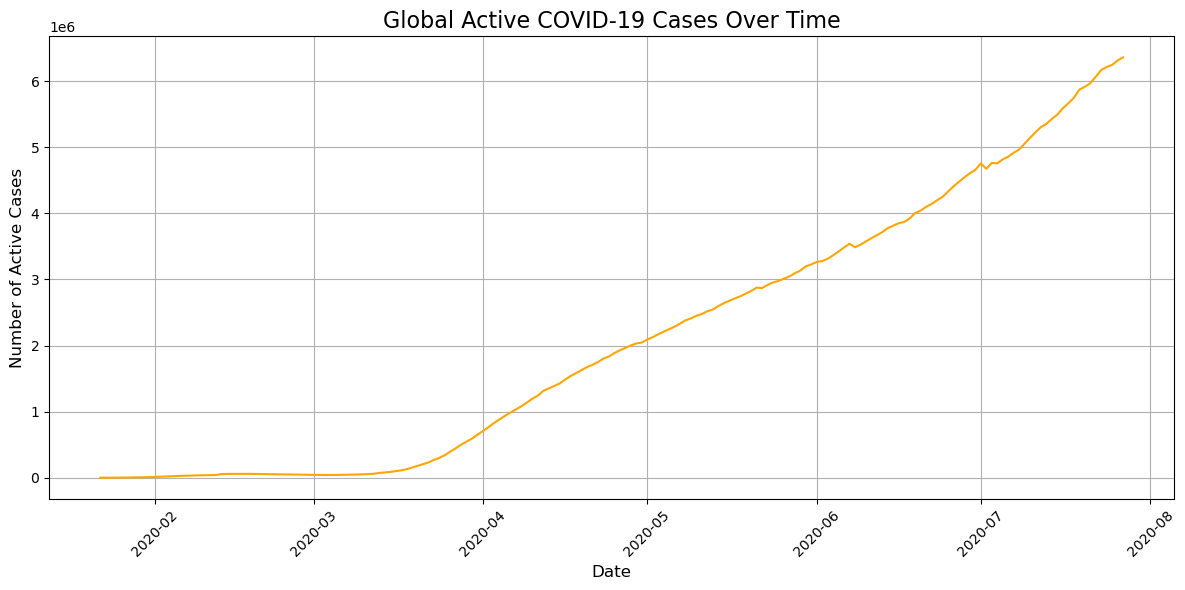

In [31]:
# Group data by date for active cases
active_trends = df.groupby('Date')['Active'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=active_trends, x='Date', y='Active', color='orange')
plt.title('Global Active COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Active Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


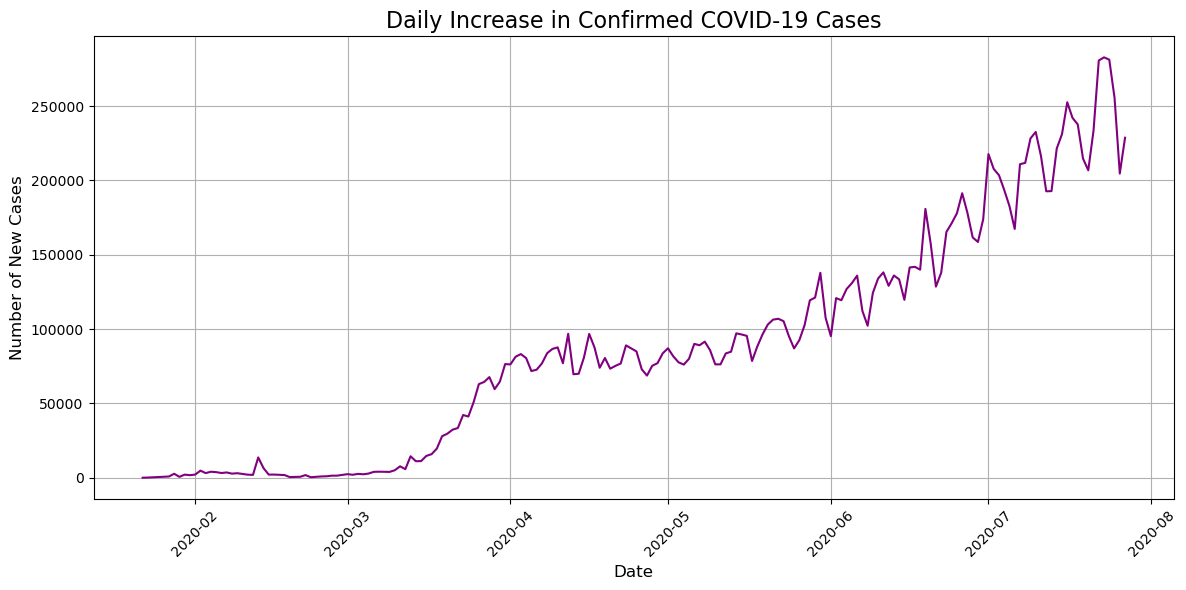

In [32]:
global_trends['Daily Increase'] = global_trends['Confirmed'].diff().fillna(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trends, x='Date', y='Daily Increase', color='purple')
plt.title('Daily Increase in Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

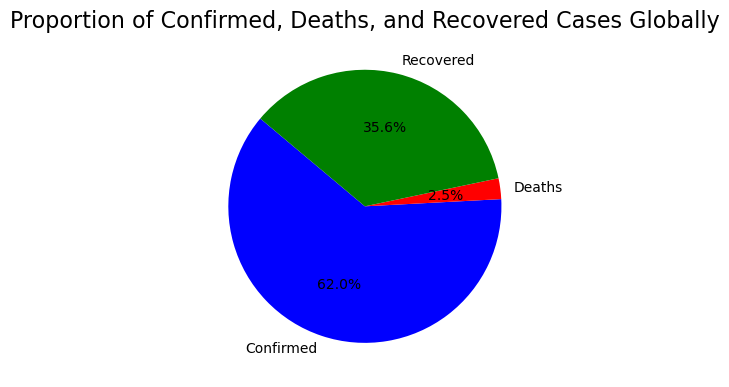

In [33]:
global_totals = global_trends[['Confirmed', 'Deaths', 'Recovered']].iloc[-1]
#Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(global_totals, labels=global_totals.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green'])
plt.title('Proportion of Confirmed, Deaths, and Recovered Cases Globally', fontsize=16)
plt.tight_layout()
plt.show()

## Forecasting the US confirmed case for next 2 months

14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing


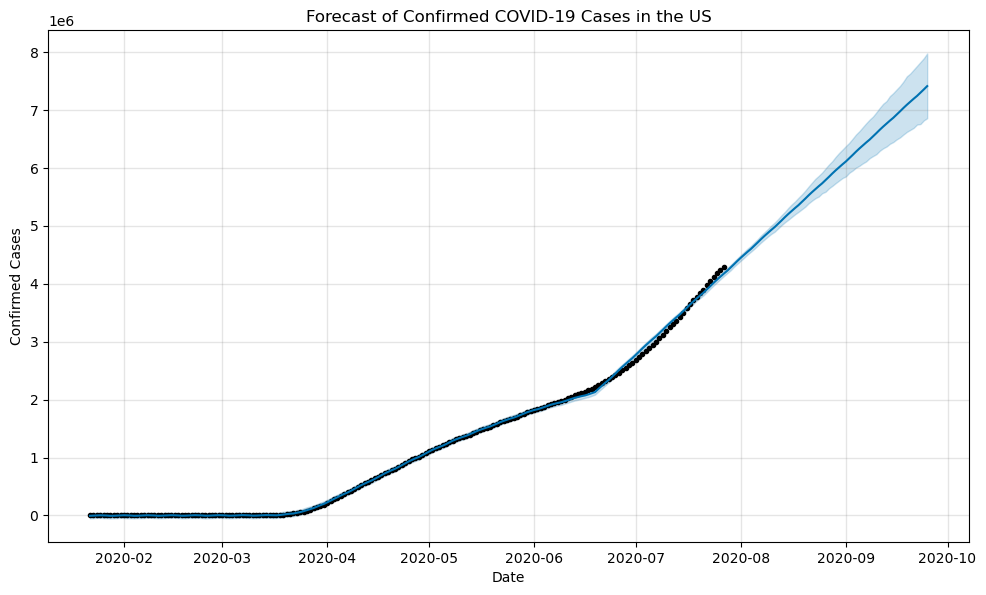

In [34]:
covid_data=df
covid_data = covid_data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
covid_data['ds'] = pd.to_datetime(covid_data['ds'])
us_data = covid_data[covid_data['Country/Region'] == 'US'][['ds', 'y']]
us_data = us_data.groupby('ds').sum().reset_index()
model = Prophet()
model.fit(us_data)  # Fit the model
future = model.make_future_dataframe(periods=60) #forecasting for 2 months
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Forecast of Confirmed COVID-19 Cases in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#### Black Points: Represent actual daily death data for the US.
#### Blue Line: Represents predicted daily deaths for the forecasted period.
#### Shaded Blue Area: Represents the confidence interval for the prediction.

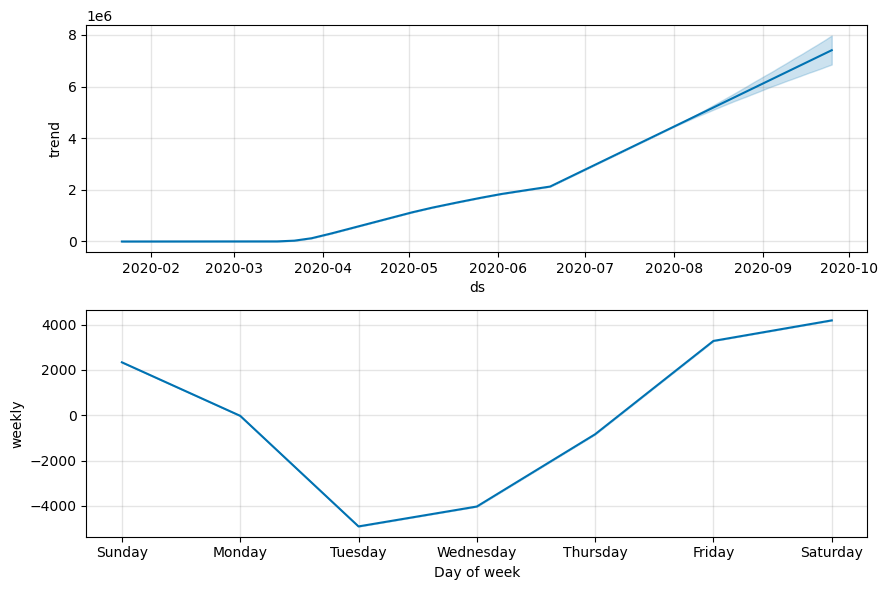

In [35]:
fig2 = model.plot_components(forecast)
plt.show()

## Forecasting the US deaths for next 2 months

14:39:35 - cmdstanpy - INFO - Chain [1] start processing
14:39:36 - cmdstanpy - INFO - Chain [1] done processing


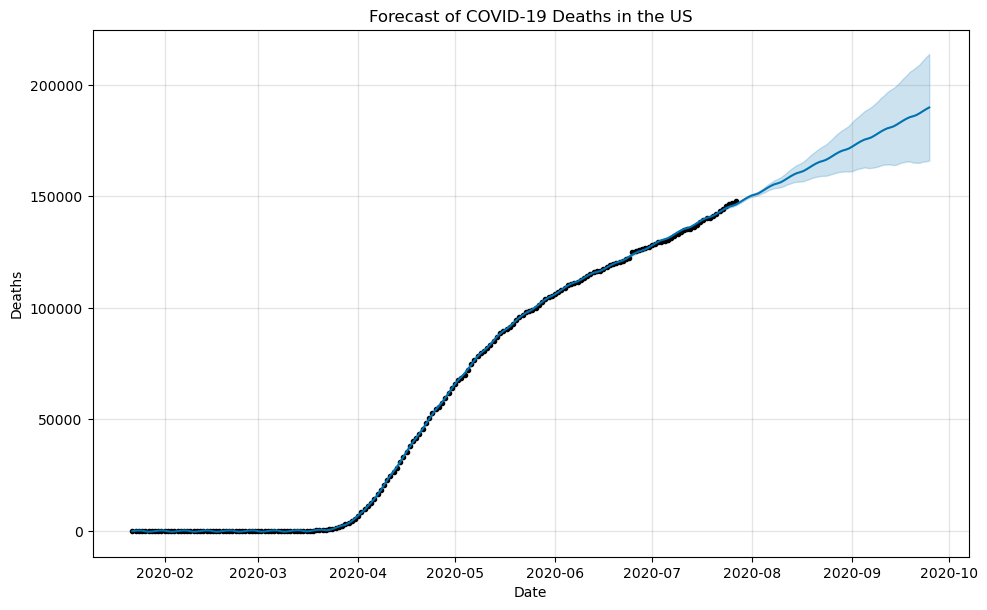

In [39]:
covid_data = covid_data.rename(columns={'Date': 'ds', 'Deaths': 'y'})
covid_data['ds'] = pd.to_datetime(covid_data['ds'])
us_deaths = covid_data[covid_data['Country/Region'] == 'US'][['ds', 'y']]
us_deaths = us_deaths.groupby('ds').sum().reset_index()
model = Prophet()
model.fit(us_deaths)  # Fit the model
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Forecast of COVID-19 Deaths in the US')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

# Summary of the COVID-19 Data Analysis Project
The COVID-19 Data Analysis and Forecasting Project involved exploring and analyzing a comprehensive dataset of global COVID-19 cases, deaths, and recoveries. The project provided key insights into the pandemic's progression across different regions and countries. Additionally, it incorporated time-series forecasting to predict future trends using Time series.

## Key Objectives:
### Data Cleaning and Preprocessing:
* Converted date columns to proper datetime formats.
* Handled missing values and ensured consistent formatting for columns.
### Exploratory Data Analysis (EDA):
* Visualized global trends in confirmed cases, recoveries, and deaths over time.
* Identified the top 10 countries with the highest confirmed cases.
* Analyzed region-wise recovery and death rates.
### Key Visualizations:
* Line Plots: Trends in confirmed cases, recoveries, and deaths across time.
* Bar Charts: Recovery and death rates across WHO regions.
* Top Countries: Bar chart for top 10 countries with the most confirmed cases.
## Time-Series Forecasting:
* Built predictive models using the Facebook Prophet library.
* Forecasted confirmed cases and deaths for the US over a 30-day period.
* Visualized the results, including confidence intervals.
### Advanced Insights:
* Aggregated data by country/region and date to analyze trends.
* Used specific filters (e.g., focusing on the US) for targeted analysis.
* Forecasted future trends for better planning and resource allocation.
## Outcomes:
* Gained actionable insights into global and regional COVID-19 trends.
* Predicted future confirmed cases and deaths in the US, aiding in proactive measures.
* Delivered detailed visualizations for better understanding and communication of findings.

####  *This project demonstrated proficiency in handling real-world datasets, performing exploratory and predictive analyses, and deriving meaningful insights using Python*